Test out algorithm for minimizing complicated shapes
https://scipydirect.readthedocs.io/en/latest/tutorial.html

Uses the DIRECT written by Joerg.M.Gablonsky, DIRECT Version 2.0.4. More information on the DIRECT
algorithm can be found in Gablonsky's thesis:
http://repository.lib.ncsu.edu/ir/bitstream/1840.16/3920/1/etd.pdf

"DIRECT" stands for "DIViding RECTangles", which is the basis of the algorithm, as can be seen by the points it chooses.  It relies on [Lipschitz continuity](https://en.wikipedia.org/wiki/Lipschitz_continuity), which may not be appropriate in some cases where there are discontinuities in the cost function.

However it is a good starting point towards finding a useable optimization algorithm that is going to be robust to experimental measure.

This example doesn't get to the absolute global minimu, but you can see it is searching around 
it and the closest false minimum for the answer.

In [1]:
# 2D-Polynomial with 6 minima
def sixhumpcamel(X, Y):
    return (4 - 2.1*(X**2) + (X**4)/3.0)*(X**2) + X*Y + (-4 + 4*(Y**2))*(Y**2)

# This is from the example page: https://scipydirect.readthedocs.io/en/latest/tutorial.html

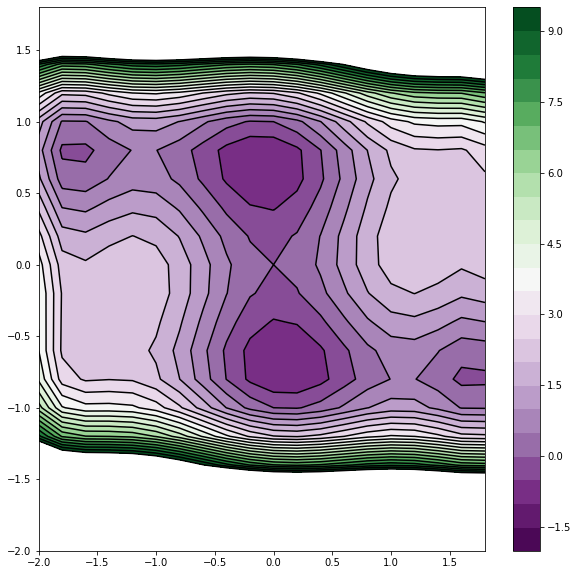

In [2]:
# Plot the contours of this polynomial using matplotlib

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

delta = 0.2

x = np.arange(-2.0, 2.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2
Z = sixhumpcamel(X,Y)

# Boost the upper limit to avoid truncation errors.
levels = np.arange(-2.0, 10.0, 0.5)

norm = cm.colors.Normalize(vmax=Z.max(), vmin=Z.min())
cmap = cm.PRGn

fig = plt.figure(figsize=(10,10))
ax = fig.gca()

cset1 = ax.contourf(X, Y, Z, levels, cmap=cm.get_cmap(cmap, len(levels) - 1))
cset2 = ax.contour(X, Y, Z, cset1.levels, colors='k')
for c in cset2.collections:
    c.set_linestyle('solid')

#cset3 = ax.contour(X, Y, Z, (0,), colors='g', linewidths=2)
fig.colorbar(cset1, ax=ax)
plt.show()

sixhumpcamel minimum after 61 iterations is -0.911394 at blue dot
global minimum is -1.031628 at green dot


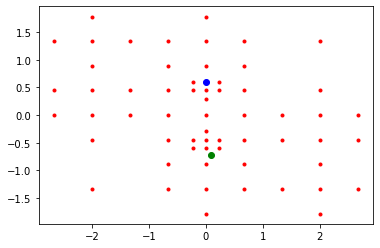

In [3]:
import scipydirect

samplex, sampley = [ ], [ ]
def obj(x):
    samplex.append(x[0])
    sampley.append(x[1])
    return sixhumpcamel(x[0], x[1])

bounds = [(-3, 3), (-2, 2)]
answerx, answery = [0.08982371, -0.71262849]
res = scipydirect.minimize(obj, bounds, maxf=60)
ranswerx, ranswery = res.x
plt.scatter(samplex, sampley, color="red", marker=".")
plt.scatter([ranswerx], [ranswery], color="blue")
plt.scatter([answerx], [answery], color="green", marker="o")

print("sixhumpcamel minimum after %d iterations is %f at blue dot" % (len(samplex), sixhumpcamel(ranswerx, ranswery)))
print("global minimum is %f at green dot" % (sixhumpcamel(answerx, answery)))



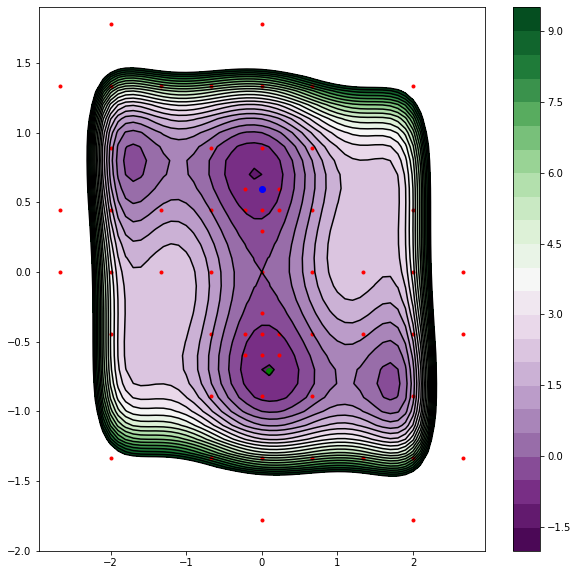

In [4]:
delta = 0.1
x = np.arange(-2.5, 2.5, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2
Z = sixhumpcamel(X,Y)

# Boost the upper limit to avoid truncation errors.
levels = np.arange(-2.0, 10.0, 0.5)

norm = cm.colors.Normalize(vmax=Z.max(), vmin=Z.min())
cmap = cm.PRGn

fig = plt.figure(figsize=(10,10))
ax = fig.gca()

cset1 = ax.contourf(X, Y, Z, levels, cmap=cm.get_cmap(cmap, len(levels) - 1))
cset2 = ax.contour(X, Y, Z, cset1.levels, colors='k')
[c.set_linestyle('solid')  for c in cset2.collections]
fig.colorbar(cset1, ax=ax)

plt.scatter(samplex, sampley, color="red", marker=".")
plt.scatter([ranswerx], [ranswery], color="blue")
plt.scatter([answerx], [answery], color="green", marker="o")

plt.show()

In [5]:
help(scipydirect.minimize)

Help on function minimize in module scipydirect:

minimize(func, bounds=None, nvar=None, args=(), disp=False, eps=0.0001, maxf=20000, maxT=6000, algmethod=0, fglobal=-1e+100, fglper=0.01, volper=-1.0, sigmaper=-1.0, **kwargs)
    Solve an optimization problem using the DIRECT (Dividing Rectangles) algorithm.
    It can be used to solve general nonlinear programming problems of the form:
    
    .. math::
    
           \min_ {x \in R^n} f(x)
    
    subject to
    
    .. math::
    
           x_L \leq  x  \leq x_U
    
    Where :math:`x` are the optimization variables (with upper and lower
    bounds), :math:`f(x)` is the objective function.
    
    Parameters
    ----------
    func : objective function
        called as func(x, *args); does not need to be defined everywhere,
        raise an Exception where function is not defined
    
    bounds : array-like
            ``(min, max)`` pairs for each element in ``x``, defining
            the bounds on that parameter.
    
   